## Car Vehicle Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:

1.name

2.year

3.selling_price

4.km_driven

5.fuel

6.seller_type

7.transmission

8.Owner

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error
import plotly.express as px

### Data Understanding

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### EDA

In [7]:
##Dropping Car_Name from the Column
df.drop(columns='Car_Name',inplace=True)

In [8]:
### Splitting categorical and numerical data presented in a columns
cate_cols=df.select_dtypes(include='object').columns
num_cols=df.select_dtypes(include='number').columns
cate_cols

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

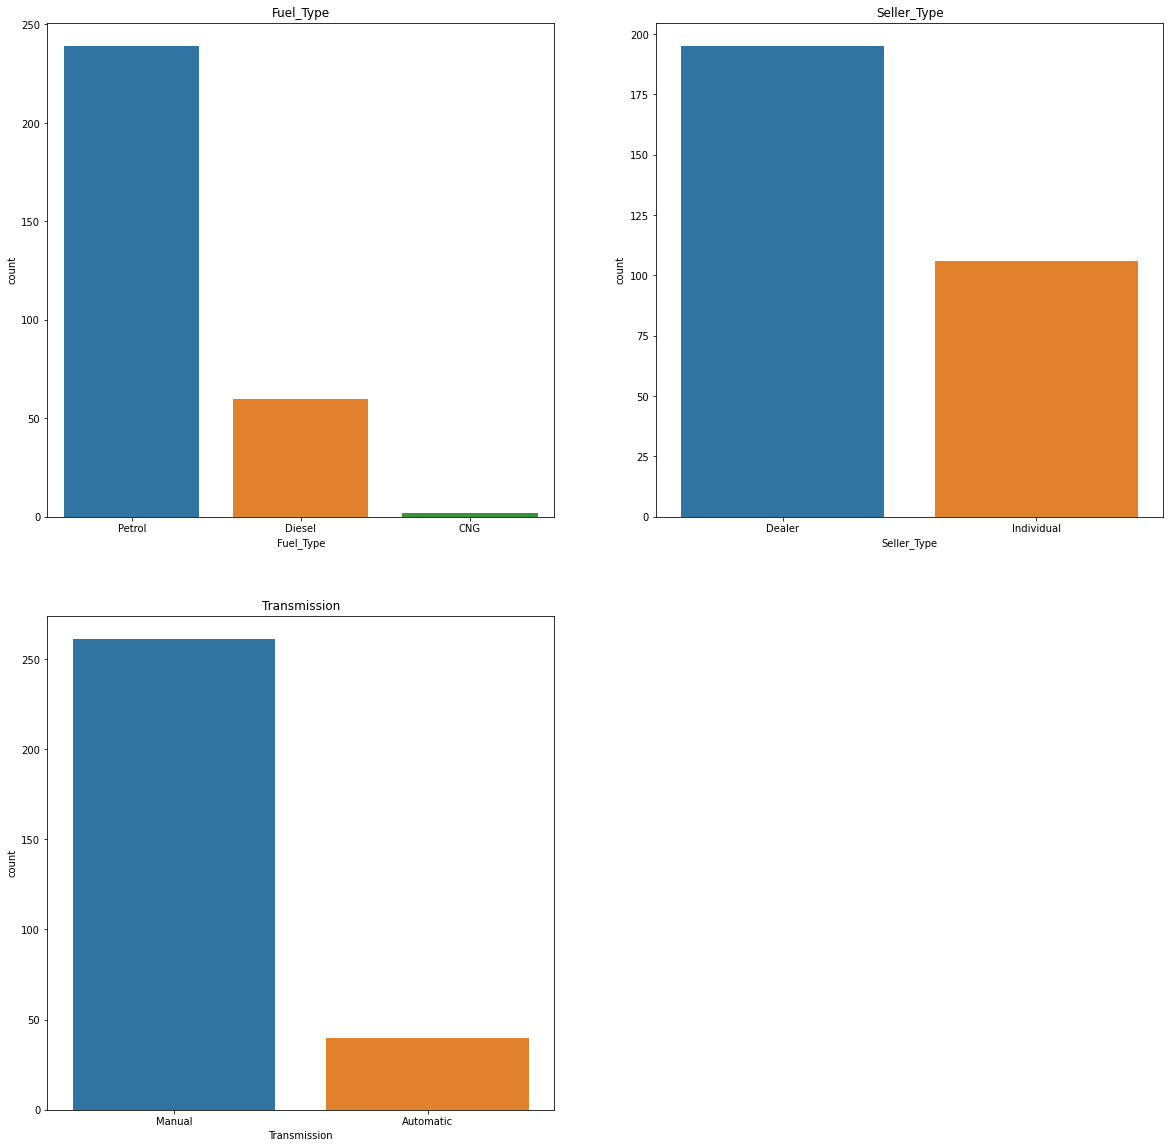

In [9]:
plt.figure(figsize=(20,20))
i=1
while i<=len(cate_cols):
    plt.subplot(2,2,i)
    sns.countplot(df[cate_cols[i-1]])
    plt.title(cate_cols[i-1])
    i+=1
plt.show()

C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

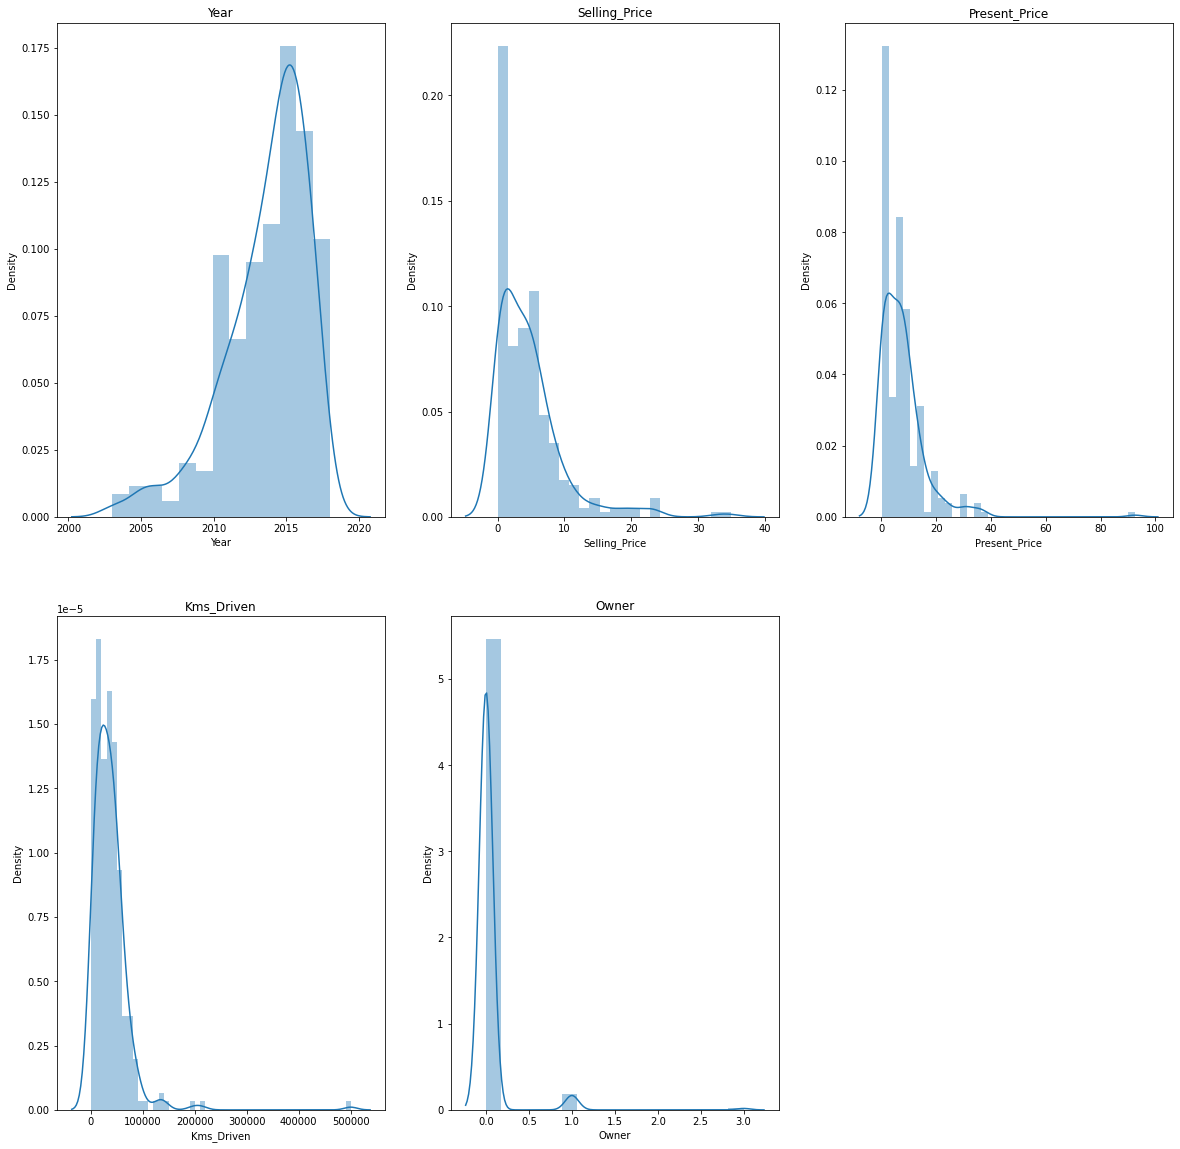

In [10]:
plt.figure(figsize=(20,20))
i=1
while i<=len(num_cols):
    plt.subplot(2,3,i)
    sns.distplot(df[num_cols[i-1]])
    plt.title(num_cols[i-1])
    i+=1
plt.show()

#### Converting Year in to Age

In [11]:
df['Age']=df.Year.max()+1-df.Year

In [12]:
df.drop(columns='Year',inplace=True)

### Outliers Detections

C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TANISH\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

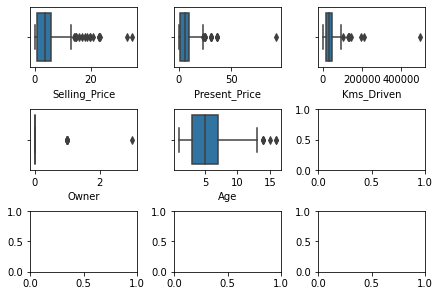

In [14]:
num_cols=df.select_dtypes(include='number').columns
fig , axes = plt.subplots(nrows=3, ncols=3, constrained_layout=True)            

for ax, column in zip(axes.flatten(),num_cols):        

    sns.boxplot(df[column],ax=ax)   

### Removing Outliers

In [15]:
def out(df):
    num_cols=df.select_dtypes(exclude='object').columns
    for i in num_cols:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        x=df[(df[i]<lower_limit)&(df[i]>upper_limit)]
        return x

In [16]:
out(df)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age


### Detecting Outliers

In [17]:
def out(df):
    num_cols=df.select_dtypes(exclude='object').columns
    for i in num_cols:
        Q1=df[i].quantile(0.25)
        Q3=df[i].quantile(0.75)
        IQR=Q3-Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        x=df[(df[i]<lower_limit)|(df[i]>upper_limit)]
        return x

In [18]:
out(df)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
50,14.90,30.61,104707,Diesel,Dealer,Automatic,0,7
51,23.00,30.61,40000,Diesel,Dealer,Automatic,0,4
52,18.00,19.77,15000,Diesel,Dealer,Automatic,0,2
53,16.00,30.61,135000,Diesel,Individual,Automatic,0,6
59,19.99,35.96,41000,Diesel,Dealer,Automatic,0,5
62,18.75,35.96,78000,Diesel,Dealer,Automatic,0,5
63,23.50,35.96,47000,Diesel,Dealer,Automatic,0,4
64,33.00,36.23,6000,Diesel,Dealer,Automatic,0,2
66,19.75,23.15,11000,Petrol,Dealer,Automatic,0,2
69,14.25,20.91,12000,Petrol,Dealer,Manual,0,3


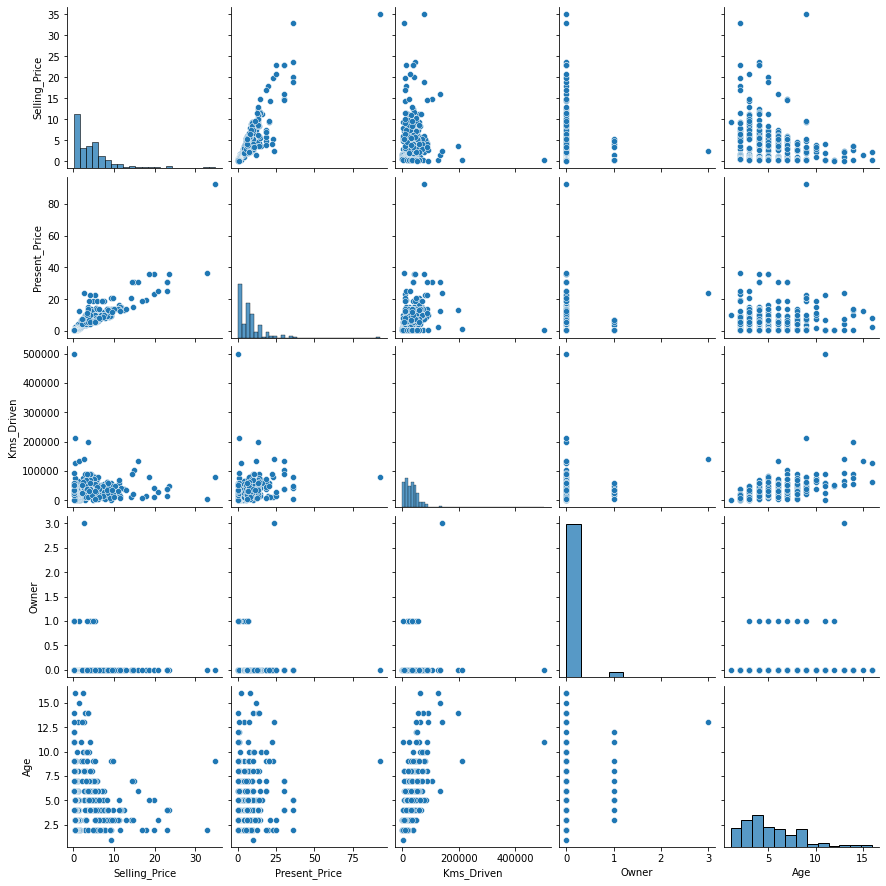

In [19]:
sns.pairplot(df)

1) As we can see in pairplot that selling price and and present price  are positively and strongly correlated with each other

2)In relationship between selling price and age,where age of car is increasing and the selling price of a car is decreasing.

               Selling_Price  Present_Price  Kms_Driven     Owner
Selling_Price       1.000000       0.878983    0.029187 -0.088344
Present_Price       0.878983       1.000000    0.203647  0.008057
Kms_Driven          0.029187       0.203647    1.000000  0.089216
Owner              -0.088344       0.008057    0.089216  1.000000


<AxesSubplot:>

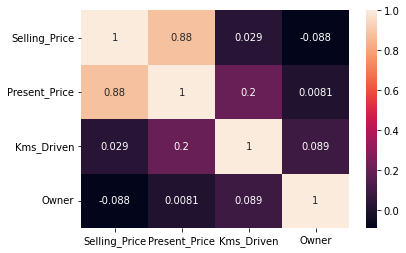

In [29]:
print(df.corr())
sns.heatmap(df.corr(),annot=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


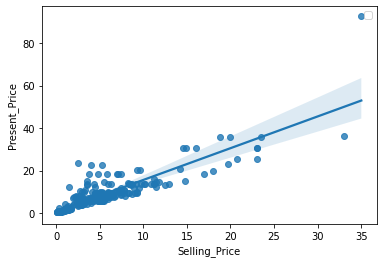

In [30]:
sns.regplot(x=df.Selling_Price,y=df.Present_Price,data=df)
plt.legend()

<AxesSubplot:xlabel='Selling_Price', ylabel='Kms_Driven'>

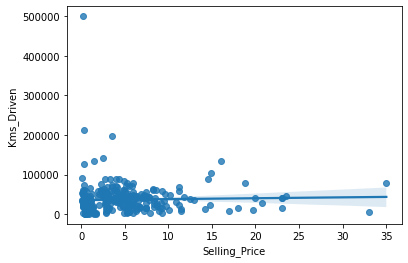

In [31]:
sns.regplot(x=df.Selling_Price,y=df.Kms_Driven,data=df)

### Data Cleaning

In [32]:
le=LabelEncoder()
df.Fuel_Type=le.fit_transform(df.Fuel_Type)
df.Seller_Type=le.fit_transform(df.Seller_Type)
df.Transmission=le.fit_transform(df.Transmission)

In [22]:
X=df.drop(columns=['Owner','Selling_Price'])
y=df.Selling_Price

### Preprocessing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Regression Algothrim Models with their Metrices

In [ ]:
models=[LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),SVR()]

##### Training Data

In [37]:
from sklearn.metrics import mean_squared_error
l=[]
for i in range(len(models)):
    models[i].fit(X_train_scaled,y_train)
    y_pred=models[i].predict(X_train_scaled)
    l.append({'Models':models[i],'MSE':mean_squared_error(y_train,y_pred),
             'R2_score':r2_score(y_train,y_pred),'MAE':mean_absolute_error(y_train,y_pred)})
pd.DataFrame(l)

,Models,MSE,R2_score,MAE
0,LinearRegression(),3.722606,0.843671,1.217974
1,Ridge(),3.723006,0.843654,1.218787
2,Lasso(),6.101329,0.743778,1.723039
3,DecisionTreeRegressor(),0.005006,0.999790,0.006905
4,SVR(),9.160151,0.615324,1.206460


##### Test Data

In [36]:
l=[]
for i in range(len(models)):
    models[i].fit(X_test_scaled,y_test)
    y_pred=models[i].predict(X_test_scaled)
    l.append({'Models':models[i],'MSE':mean_squared_error(y_test,y_pred),
             'R2_score':r2_score(y_test,y_pred),'MAE':mean_absolute_error(y_test,y_pred)})
pd.DataFrame(l)

,Models,MSE,R2_score,MAE
0,LinearRegression(),2.726773,0.908822,1.129090
1,Ridge(),2.741663,0.908324,1.117034
2,Lasso(),5.299600,0.822792,1.450339
3,DecisionTreeRegressor(),0.000000,1.000000,0.000000
4,SVR(),15.886506,0.468786,1.606174


### Conclusion

As we were using different algorithm on this dataset.In r2_score it is identified that linear regression,ridge performs good and Decision Tree regressor performs
best on this model.